In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
embeddings_dict = {}

In [3]:
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [4]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [5]:
find_closest_embeddings(embeddings_dict["king"])[:5]

['king', 'prince', 'queen', 'uncle', 'ii']

In [6]:
find_closest_embeddings(embeddings_dict["king"])[1:6]

['prince', 'queen', 'uncle', 'ii', 'grandson']

In [7]:
print(find_closest_embeddings(embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"])[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']


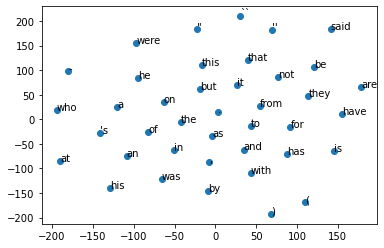

In [21]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:40])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

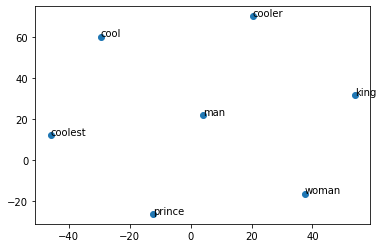

In [31]:
tsne = TSNE(n_components=2, random_state=0)
words =  ["cool", "coolest", "cooler", "king","prince","man","woman"]
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:10])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()